## Analysis of State Vector Simulator

Before we begin, we will add the src directory in sys.paths so that we can import the code from it. 

In [7]:
import sys
import os

# Add the src directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

In [6]:
import time
import matplotlib.pyplot as plt
from gates import Gates
from matrix_simulation import NaiveQuantumCircuit
from tensor_simulation import AdvanceQuantumCircuit

#### 1. Naive simulation using matrix multiplication

In [3]:
def apply_operations_matrix(num_qubits, print_probabilities=False):
    naive_circuit = NaiveQuantumCircuit(num_qubits)
    for qubit in range(num_qubits):
        if (qubit + 1) % 2 != 0:
            naive_circuit.apply_single_qubit_gate(Gates.H, qubit)  # Apply H gate 
        else:
            naive_circuit.apply_cnot_gate(qubit-1, qubit)  # Apply CNOT gate
    if print_probabilities:
        print(f"For {num_qubits} qubits:")
        print(f"Probabilities: {naive_circuit.get_probabilities()}")
    

In [14]:
qubit_counts = range(1,7 + 1)
# Perform analysis for each qubit count
for num_qubits in qubit_counts:
    # MATRIX SIMULATION
    start_time = time.time()
    apply_operations_matrix(num_qubits, print_probabilities=True)
    end_time = time.time()
    print(f"Time taken: {end_time - start_time} sec")
    print("---------------------------------------------------------------------------")

For 1 qubits:
Probabilities: {'|0>': 0.5, '|1>': 0.5}
Time taken: 0.0012328624725341797 sec
---------------------------------------------------------------------------
For 2 qubits:
Probabilities: {'|00>': 0.5, '|01>': 0.0, '|10>': 0.0, '|11>': 0.5}
Time taken: 0.001214742660522461 sec
---------------------------------------------------------------------------
For 3 qubits:
Probabilities: {'|000>': 0.25, '|001>': 0.25, '|010>': 0.0, '|011>': 0.0, '|100>': 0.0, '|101>': 0.0, '|110>': 0.25, '|111>': 0.25}
Time taken: 0.0010821819305419922 sec
---------------------------------------------------------------------------
For 4 qubits:
Probabilities: {'|0000>': 0.25, '|0001>': 0.0, '|0010>': 0.0, '|0011>': 0.25, '|0100>': 0.0, '|0101>': 0.0, '|0110>': 0.0, '|0111>': 0.0, '|1000>': 0.0, '|1001>': 0.0, '|1010>': 0.0, '|1011>': 0.0, '|1100>': 0.25, '|1101>': 0.0, '|1110>': 0.0, '|1111>': 0.25}
Time taken: 0.0038857460021972656 sec
-----------------------------------------------------------------

#### 2. Advanced simulation using tensor multiplication

In [4]:
def apply_operations_tensor(num_qubits, print_probabilities=False):
    advance_circuit = AdvanceQuantumCircuit(num_qubits)
    for qubit in range(num_qubits):
        if (qubit + 1) % 2 != 0:
            advance_circuit.apply_single_qubit_gate(Gates.H, qubit)  # Apply H gate on each qubit
        else:
            advance_circuit.apply_cnot_gate(qubit-1, qubit)  # Apply CNOT gate between
    if print_probabilities:
        print(f"For {num_qubits} qubits:")
        print(f"Probabilities: {advance_circuit.get_probabilities()}")
            

In [15]:
qubit_counts = range(1,7 + 1)
# Perform analysis for each qubit count
for num_qubits in qubit_counts:
    # TENSOR SIMULATION
    start_time = time.time()
    apply_operations_tensor(num_qubits, print_probabilities=True)
    end_time = time.time()
    print(f"Time taken: {end_time - start_time} sec")
    print("---------------------------------------------------------------------------")

For 1 qubits:
Probabilities: {'|0>': 0.5, '|1>': 0.5}
Time taken: 0.009400367736816406 sec
---------------------------------------------------------------------------
For 2 qubits:
Probabilities: {'|00>': 0.5, '|01>': 0.0, '|10>': 0.0, '|11>': 0.5}
Time taken: 0.004463911056518555 sec
---------------------------------------------------------------------------
For 3 qubits:
Probabilities: {'|000>': 0.25, '|001>': 0.25, '|010>': 0.0, '|011>': 0.0, '|100>': 0.0, '|101>': 0.0, '|110>': 0.25, '|111>': 0.25}
Time taken: 0.0019822120666503906 sec
---------------------------------------------------------------------------
For 4 qubits:
Probabilities: {'|0000>': 0.25, '|0001>': 0.0, '|0010>': 0.0, '|0011>': 0.25, '|0100>': 0.0, '|0101>': 0.0, '|0110>': 0.0, '|0111>': 0.0, '|1000>': 0.0, '|1001>': 0.0, '|1010>': 0.0, '|1011>': 0.0, '|1100>': 0.25, '|1101>': 0.0, '|1110>': 0.0, '|1111>': 0.25}
Time taken: 0.0 sec
---------------------------------------------------------------------------
For 5 qu

#### Analyzing the runtimes

In [5]:
def run_simulations(qubit_upper_limit):
    # Number of qubits to test for each simulation type
    qubit_counts = range(1, qubit_upper_limit + 1)  

    # Store runtimes
    matrix_simulation_times = []  
    tensor_simulation_times = []
    
    # Perform analysis for each qubit count
    for num_qubits in qubit_counts:
        # MATRIX SIMULATION
        start_time = time.time()
        apply_operations_matrix(num_qubits)
        end_time = time.time()
        matrix_simulation_times.append(end_time - start_time)
        
        # TENSOR SIMULATION
        start_time = time.time()
        apply_operations_tensor(num_qubits)
        end_time = time.time()
        tensor_simulation_times.append(end_time - start_time)
        
    return {"matrix_simulation_times": matrix_simulation_times,
            "tensor_simulation_times": tensor_simulation_times}

In [6]:
def plotting_runtimes(qubit_upper_limit, matrix_simulation_times, tensor_simulation_times):
    qubit_counts = range(1, qubit_upper_limit + 1)  
    
    plt.figure(figsize=(12, 6))
    plt.plot(qubit_counts, matrix_simulation_times, label="Matrix Simulation", marker='o')
    plt.plot(qubit_counts, tensor_simulation_times, label="Tensor Simulation", marker='x')
    plt.xlabel("Number of Qubits")
    plt.ylabel("Runtime (seconds)")
    plt.title("Runtime of Matrix vs Tensor Simulation as a Function of Number of Qubits")
    plt.legend()
    plt.grid()
    plt.show()

#### Plotting the results

In [7]:
def analyze_runtimes(qubit_upper_limit):
    runtimes = run_simulations(qubit_upper_limit)
    plotting_runtimes(qubit_upper_limit, runtimes["matrix_simulation_times"], runtimes["tensor_simulation_times"])

##### For 1 to 5 Qubits

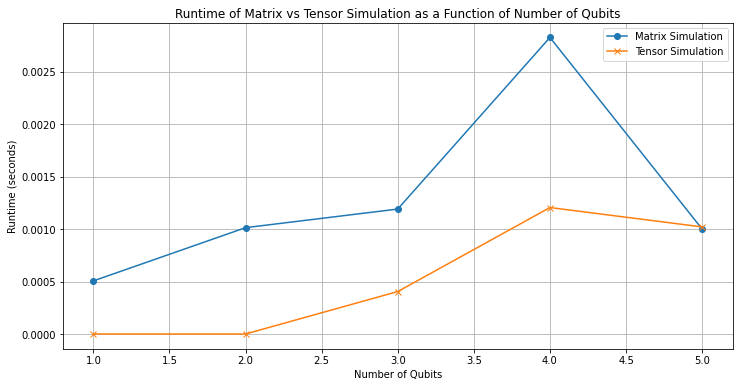

In [23]:
analyze_runtimes(5)

##### For 1 to 10 Qubits

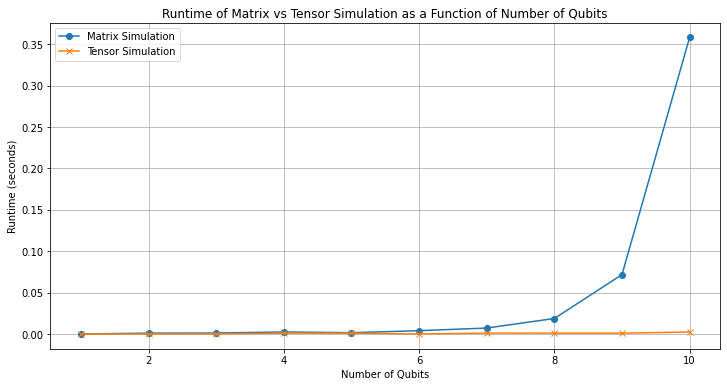

In [24]:
analyze_runtimes(10)

##### For 1 to 15 Qubits

In [106]:
analyze_runtimes(15)

MemoryError: Unable to allocate 8.00 GiB for an array with shape (16384, 32768, 2) and data type float64

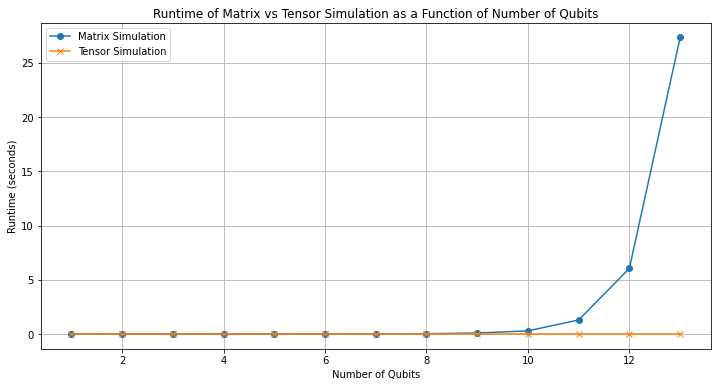

In [175]:
analyze_runtimes(13)

### How many qubits can be simulated

#### Matrix simulation

In [107]:
apply_operations_matrix(13, print_probabilities=True)

For 13 qubits:
Probabilities: {'|0000000000000>': 0.0078, '|0000000000001>': 0.0078, '|0000000000010>': 0.0, '|0000000000011>': 0.0, '|0000000000100>': 0.0, '|0000000000101>': 0.0, '|0000000000110>': 0.0078, '|0000000000111>': 0.0078, '|0000000001000>': 0.0, '|0000000001001>': 0.0, '|0000000001010>': 0.0, '|0000000001011>': 0.0, '|0000000001100>': 0.0, '|0000000001101>': 0.0, '|0000000001110>': 0.0, '|0000000001111>': 0.0, '|0000000010000>': 0.0, '|0000000010001>': 0.0, '|0000000010010>': 0.0, '|0000000010011>': 0.0, '|0000000010100>': 0.0, '|0000000010101>': 0.0, '|0000000010110>': 0.0, '|0000000010111>': 0.0, '|0000000011000>': 0.0078, '|0000000011001>': 0.0078, '|0000000011010>': 0.0, '|0000000011011>': 0.0, '|0000000011100>': 0.0, '|0000000011101>': 0.0, '|0000000011110>': 0.0078, '|0000000011111>': 0.0078, '|0000000100000>': 0.0, '|0000000100001>': 0.0, '|0000000100010>': 0.0, '|0000000100011>': 0.0, '|0000000100100>': 0.0, '|0000000100101>': 0.0, '|0000000100110>': 0.0, '|0000000

In [108]:
apply_operations_matrix(14, print_probabilities=True)

MemoryError: Unable to allocate 2.00 GiB for an array with shape (1, 16384, 16384) and data type float64

#### Tensor simulation

In [34]:
start_time = time.time()
apply_operations_tensor(15)
end_time = time.time()
print(f"Time taken to simulate 15 qubits {end_time - start_time} sec")

Time taken to simulate 15 qubits 0.0075495243072509766 sec


In [37]:
start_time = time.time()
apply_operations_tensor(30)
end_time = time.time()
print(f"Time taken to simulate 20 qubits {end_time - start_time} sec")

MemoryError: Unable to allocate 8.00 GiB for an array with shape (2, 536870912) and data type float64

In [9]:
start_time = time.time()
apply_operations_tensor(29)
end_time = time.time()
print(f"Time taken to simulate 29 qubits {end_time - start_time} sec")

Time taken to simulate 29 qubits 832.900890827179 sec
